<a href="https://colab.research.google.com/github/AngeloImon/Aulas-IA/blob/main/Aula_IA_3_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron

O algoritmo Perceptron é um tipo de algoritmo de aprendizado supervisionado utilizado para problemas de classificação binária. Ele foi proposto em 1958 por Frank Rosenblatt e é inspirado no funcionamento dos neurônios humanos. O Perceptron é a base para redes neurais mais complexas e é utilizado para determinar se uma entrada pertence a uma classe ou não.

O Perceptron funciona recebendo múltiplos parâmetros de entrada, cada um com um peso associado. Esses pesos são ajustados durante o processo de treinamento para minimizar o erro de classificação. A ideia básica é combinar os parâmetros de entrada de forma linear e aplicar uma função de ativação para determinar a saída.

In [30]:
import numpy as np                # cálculos numéricos
import matplotlib.pyplot as plt   # visualizações

Função de ativação Heaviside: Uma função chamada heaviside é definida. Esta função recebe um valor x e retorna 1 se x for maior ou igual a zero, e 0 caso contrário. Esta função é usada para decidir se um neurônio (ou perceptron) deve “disparar” ou não.

In [31]:
# Função de ativação Heaviside (função degrau)
# Retorna 1 para cada elemento se x >= 0 ; caso contrário retorna 0
def heaviside(x):
    return np.where(x >= 0, 1, 0)

Definição da classe Perceptron: A classe chamada Perceptron é definida. Dentro desta classe, há um método especial chamado __init__, que é usado para inicializar os parâmetros do perceptron, como a taxa de aprendizagem (learning_rate), o número de épocas (epochs), os pesos e o viés (bias). Inicialmente, os pesos e o viés são configurados como None.

In [32]:
# Definir a classe Perceptron, que implementa o algoritmo de aprendizagem
class Perceptron:
    # Construtor inicializa os parametros do perceptron
    # Learning_rate: taxa de aprendizado que atualiza os pesos
    # Epochs: números de vezes que o conjunto de dados será percorrido para o treinamento
    def __init__(self, learning_rate=0.1, epochs=1000):
        self.learning_rate = learning_rate # Taxa de aprendizado
        self.epochs = epochs               # Número de iterações
        self.weights = None                # Pesos
        self.bias = None                   # Constante de ajuste

    # Método para treinar o perceptron
    def fit(self, X, y):
        # X matriz de entrada (n_samples (linha), n_features (coluna - variavel))
        # y vetor de rótulos
        n_samples, n_features = X.shape

        # Inicializa os pesos com zeros (um peso para cada feature)
        self.weights = np.zeros(n_features)
        # Bias = 0
        self.bias = 0

        # Loop de treinamento que percorre o conjunto de dados por 'épocas' vezes
        for _ in range(self.epochs):
            # Para cada amostra(x_i) e seu respectivo rótulo (y[idx])
            for idx, x_i in enumerate(X):
                # Calcula a saída linear: soma ponderada das feature + bias
                linear_output = np.dot(x_i, self.weights) + self.bias
                # Aplica a função de ativação degrau para obeter a prediçao (0 ou 1)
                y_predicted = heaviside(linear_output)

                # Calcula a atualização: diferença entre o valor real e a predição, multiplicada pela tx de aprendizado
                update = self.learning_rate * (y[idx] - y_predicted)
                # Atualiza os pesos: cada peso é ajustado de acordo com o valor da entrada
                self.weights += update * x_i
                # Atualiza o bias com o mesmo valor de atualização
                self.bias += update

    # Método para realiza prediçoes em novos dados
    def predict(self, X):
        # Calcula a saída linear para os dados de entrada X
        linear_output = np.dot(X, self.weights) + self.bias
        # Retorna a predição aplicando a função de ativação
        return heaviside(linear_output)

## Learning Rate e Epochs

* Learning Rate (Taxa de Aprendizado):
    - É um hiperparâmetro que controla o tamanho dos passos dados na atualização dos pesos durante o treinamento. Em outras palavras, determina o quanto os pesos serão ajustados a cada iteração com base no erro da predição.

* Valores Pequenos:
    - Atualizações mais suaves. Pode levar mais tempo para convergir, mas é menos provável que ultrapasse o mínimo da função de erro.

* Valores Grandes:
    - Atualizações mais rápidas. No entanto, podem fazer com que o algoritmo "salte" o ponto ideal ou oscile, não convergindo adequadamente.

* Como Escolher:
    - Geralmente, inicia-se com valores comuns, como 0.01, 0.1 ou 0.001, e ajusta-se com base na performance do modelo e na estabilidade da convergência.

* Epochs (Épocas):
    - Uma época representa uma passagem completa por todo o conjunto de treinamento. Durante cada época, o algoritmo passa por cada amostra uma vez para atualizar os pesos.

* Mais Épocas:
    - Permite que o modelo aprenda melhor, especialmente se o aprendizado for gradual. Mas muitas épocas podem levar ao sobreajuste (overfitting), onde o modelo se ajusta demais aos dados de treinamento e perde a capacidade de generalização.

* Menos Épocas:
    - Pode resultar em um modelo que não aprendeu o suficiente (subajuste ou underfitting).

* Como Escolher:
    - É comum começar com um número razoável (por exemplo, 100, 500 ou 1000 épocas) e monitorar a evolução do erro durante o treinamento. Se o erro continuar diminuindo significativamente, pode ser interessante aumentar o número de épocas. Se o erro estabilizar ou começar a aumentar (indicando overfitting), pode ser o sinal de que o treinamento já é suficiente.

In [33]:
# Gera um conjunto de dados para testar o perceptron
np.random.seed(42)    # Garante a reprodutibilidade dos dados
n_samples = 100       # Número de amostras por classe

# Classe 0: amostras geradas de uma distro normal centrada em (1, 1)
X_class0 = np.random.randn(n_samples, 2) * 0.5 + np.array([1,1])

# Classe 1: amostras geradas de uma distro normal centrada em (3, 3)
X_class1 = np.random.randn(n_samples, 2) * 0.5 + np.array([3,3])

# Compõe matriz com ambas as classes
X = np.vstack((X_class0, X_class1))

# Cria os rótulos: 0 para classe 0 e 1 para classe 1
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Embaralha o dataset para misturar as classes
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X = X[indices]
y = y[indices]

In [34]:
# Treina o perceptron com base nos dados criados
perceptron = Perceptron(learning_rate=0.1, epochs=10)

# Treina o modelo com os dados
perceptron.fit(X, y)

# Realiza predições para o conjunto de dados
predictions = perceptron.predict(X)

# Calcula e exibe a acurácia do modelo
accuracy = np.mean(predictions == y)
print(f"Acurácia: {accuracy * 100:.2f}%")

Acurácia: 100.00%


# Visualização da Fronteira de Decisão

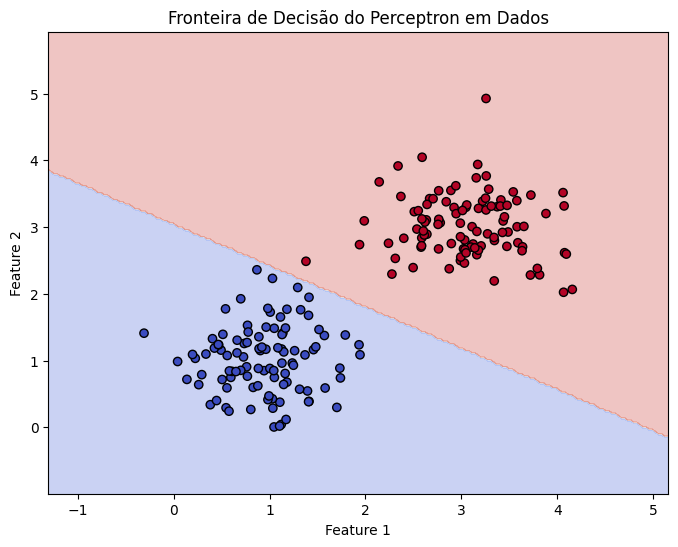

In [35]:
# Define os limites do gráfico com base nos dados
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

# Cria uma malha de pontos com 200 pontos em cada eixo
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Concatena os pontos da malha em uma matriz com duas colunas
grid = np.c_[xx.ravel(), yy.ravel()]

# Prediz as classes para cada ponto da malha usando o perceptron treinado
Z = perceptron.predict(grid)
Z = Z.reshape(xx.shape)  # Redimensiona o resultado para a forma da malha

# Plota a fronteira de decisão com um contorno preenchido
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plota os pontos dos dados, colorindo de acordo com a classe
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Fronteira de Decisão do Perceptron em Dados")
plt.show()

# MLP - Perceptron multi-camadas

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Carregar o dataset
data = load_breast_cancer()

X = data.data # Features - variaveis
y = data.target # Rótulos (0: maligno, 1: benigno)

In [37]:
# Divide os dados em conjunto de treinamento (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
# Normalizar os dados (redes neurais trabalham melhor com dados padronizados)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

StandardScaler:

- Padroniza os dados para terem média 0 e desvio padrão 1.

- É frequentemente usado em redes neurais, pois muitos algoritmos de otimização e funções de ativação (como a ReLU ou a tanh) funcionam melhor com dados padronizados.

- Geralmente é mais robusto quando os dados possuem outliers ou distribuições não uniformes.

MinMaxScaler:

- Padrão colocar todos os dados entre 0 e 1

# Configuração do Modelo MLP e Exploração de Parâmetros

In [39]:
# Neste bloco definimos um espaço de busca (param_grid) para alguns hiperparâmetros do MLPClassifier.
# Esses hiperparâmetros influenciam a arquitetura e o processo de treinamento da rede.
#
# Parâmetros explorados:
# - 'hidden_layer_sizes': Define a arquitetura das camadas ocultas.
#   Exemplos:
#     (50,)        -> 1 camada oculta com 50 neurônios.
#     (100,)       -> 1 camada oculta com 100 neurônios.
#     (100, 50)    -> 2 camadas ocultas, com 100 neurônios na primeira e 50 na segunda.
#     (100, 50, 25)-> 3 camadas ocultas, com 100, 50 e 25 neurônios respectivamente.
#
# - 'alpha': Parâmetro de regularização L2. Valores maiores penalizam pesos altos e ajudam a evitar overfitting.
#
# - 'learning_rate_init': Define a taxa inicial de aprendizado, que controla o tamanho dos passos durante a atualização dos pesos.
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,), (100, 50), (100, 50, 25)],
    'alpha': [0.0001, 0.001],
    'learning_rate_init': [0.001, 0.01]
}

# Cria uma instância do MLPClassifier.
# max_iter=2000 define o número máximo de iterações para o treinamento, garantindo que o modelo tenha tempo suficiente para convergir.
# random_state=42 garante que os resultados sejam reprodutíveis.
mlp = MLPClassifier(max_iter=2000, random_state=42)

# GridSearchCV faz uma busca exaustiva sobre as combinações dos hiperparâmetros definidos em param_grid.
# cv=5 utiliza 5-fold cross-validation para avaliar cada combinação.
# n_jobs=-1 utiliza todos os núcleos disponíveis para acelerar o processo.
# verbose=1 fornece informações detalhadas sobre o andamento da busca.
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=1)

# Executa a busca ajustando o modelo aos dados de treinamento padronizados.
grid_search.fit(X_train_scaled, y_train)

# Exibe os melhores hiperparâmetros encontrados pela busca.
print("Melhores parâmetros:", grid_search.best_params_)

# Seleciona o melhor modelo (MLPClassifier com os hiperparâmetros otimizados).
best_mlp = grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros: {'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate_init': 0.001}


In [40]:
# Avaliação do modelo
y_pred = best_mlp.predict(X_test_scaled)

# Calcular e exibir a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy * 100:.2f}%")

# Exibir todas as métricas de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

Acurácia: 98.83%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171



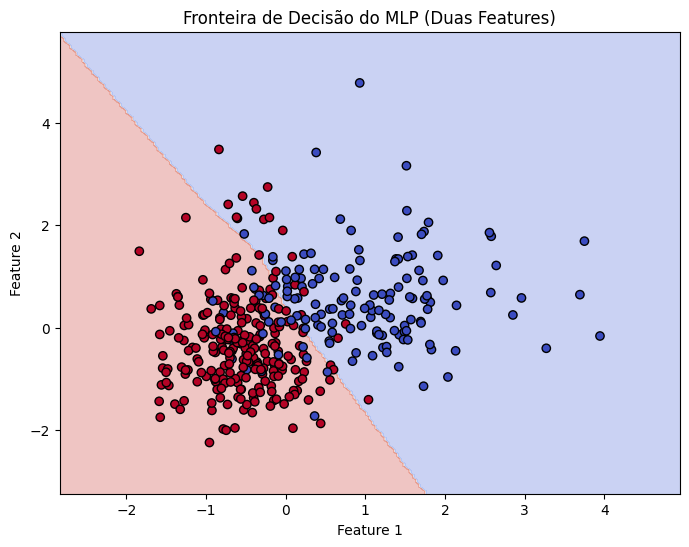

In [41]:
# Para facilitar a visualização, usamos apenas as duas primeiras features do conjunto de treinamento padronizado.
X_vis = X_train_scaled[:, :2]

# Treinamos um novo modelo MLP com as mesmas configurações dos melhores hiperparâmetros,
# mas apenas com as duas features selecionadas.
mlp_vis = MLPClassifier(hidden_layer_sizes=grid_search.best_params_['hidden_layer_sizes'],
                        alpha=grid_search.best_params_['alpha'],
                        learning_rate_init=grid_search.best_params_['learning_rate_init'],
                        max_iter=2000, random_state=42)
mlp_vis.fit(X_vis, y_train)

# Define os limites do gráfico com base nos valores mínimos e máximos das duas features.
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

# Cria uma malha de pontos com 200 pontos em cada eixo para gerar um grid.
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Concatena os pontos da malha em uma matriz de duas colunas (cada linha é um par de valores).
grid_vis = np.c_[xx.ravel(), yy.ravel()]

# Usa o modelo treinado para prever a classe para cada ponto do grid.
Z = mlp_vis.predict(grid_vis)
Z = Z.reshape(xx.shape)  # Redimensiona as predições para a forma da malha

# Plota a fronteira de decisão usando um contorno preenchido.
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

# Plota os pontos dos dados de visualização com cores de acordo com suas classes.
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_train, edgecolor='k', cmap=plt.cm.coolwarm)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Fronteira de Decisão do MLP (Duas Features)")
plt.show()

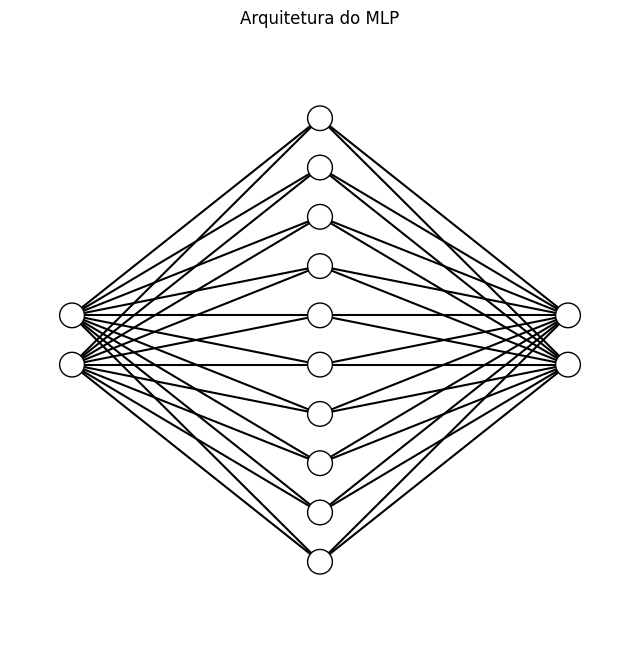

In [42]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    """
    Desenha uma rede neural (MLP) usando Matplotlib.

    Parâmetros:
    - ax: objeto matplotlib.axes.Axes onde o desenho será feito.
    - left, right, bottom, top: coordenadas que definem a área do desenho.
    - layer_sizes: lista de inteiros, onde cada valor representa o número de neurônios em cada camada.
      Por exemplo, [5, 3, 1] indica 5 neurônios na camada de entrada, 3 na camada oculta e 1 na camada de saída.
    """
    # Espaçamento vertical: baseado no maior número de neurônios em uma camada
    v_spacing = (top - bottom) / float(max(layer_sizes))
    # Espaçamento horizontal: baseado no número de camadas
    h_spacing = (right - left) / float(len(layer_sizes) - 1)

    # Desenha os neurônios para cada camada
    for n, layer_size in enumerate(layer_sizes):
        # Calcula a posição vertical central para os neurônios da camada n
        layer_top = v_spacing * (layer_size - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size):
            # Desenha um círculo representando um neurônio
            circle = plt.Circle((left + n * h_spacing, layer_top - m * v_spacing),
                                v_spacing / 4,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
            # Opcional: Adicionar rótulo ao neurônio
            # ax.text(left + n * h_spacing, layer_top - m * v_spacing, f"{m}",
            #         fontsize=8, ha='center', va='center')

    # Desenha as conexões entre neurônios de camadas consecutivas
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing * (layer_size_a - 1) / 2.0 + (top + bottom) / 2.0
        layer_top_b = v_spacing * (layer_size_b - 1) / 2.0 + (top + bottom) / 2.0
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                # Cria uma linha conectando cada neurônio da camada n ao neurônio da camada n+1
                line = plt.Line2D([left + n * h_spacing, left + (n+1) * h_spacing],
                                  [layer_top_a - m * v_spacing, layer_top_b - o * v_spacing],
                                  c='k')
                ax.add_artist(line)

# Exemplo de uso:
# Definindo a arquitetura do MLP: 5 neurônios na camada de entrada, 3 na camada oculta e 1 na camada de saída.
layer_sizes = [2, 10, 2]

fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.axis('off')  # Oculta os eixos para uma melhor visualização
draw_neural_net(ax, left=0.1, right=0.9, bottom=0.1, top=0.9, layer_sizes=layer_sizes)
plt.title("Arquitetura do MLP")
plt.show()
